In [27]:
import pandas as pd  #used
import numpy as np  #used
import json
import seaborn as sns  #used
import matplotlib as plt  #used
import matplotlib.pyplot as plt #used
from bokeh.plotting import figure  #used
from bokeh.io import output_notebook, show  #used
from bokeh.models import ColumnDataSource  #used
from bokeh.layouts import gridplot  #used
from bokeh.plotting import output_file  #used
from scipy import stats
import geopandas as gpd #used
import plotly.graph_objects as go

from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartoframes.viz import Map, Layer, popup_element
from cartoframes.data.services import Geocoding
import folium 
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster 
import requests 
from bs4 import BeautifulSoup
from tabulate import tabulate

In [2]:
restaurants2 = "../output/restaurants2.geojson"
map_data = gpd.read_file(restaurants2)
map_data.head()

,restaurant,michelin_stars,city,province,region,coordenates,latitude,longitude,price_menu_1,price_menu_2,price_average,type_of_cooking1,type_of_cooking2,international_cooking,regional_cooking,geometry
0,Mantua,1,Jerez de la Frontera,Cadiz,Andalucia,"36.6874279,-6.1380431",36.687428,-6.138043,75,90.0,82.5,Moderna,,,,POINT (-6.13804 36.68743)
1,Lu Cocina y Alma,1,Jerez de la Frontera,Cadiz,Andalucia,"36.6876237,-6.1376777",36.687624,-6.137678,90,150.0,120.0,Moderna,,,,POINT (-6.13768 36.68762)
2,Aponiente,3,El Puerto de Santa Maria,Cadiz,Andalucia,"36.605854,-6.2157528",36.605854,-6.215753,215,,215.0,Creativa,Innovadora,,,POINT (-6.21575 36.60585)
3,Alevante,1,Novo Sancti Petri,Cadiz,Andalucia,"36.3442398,-6.1616944",36.344240,-6.161694,115,135.0,125.0,Creativa,Innovadora,,,POINT (-6.16169 36.34424)
4,Abantal,1,Sevilla,Sevilla,Andalucia,"37.3879127,-5.98587",37.387913,-5.985870,80,100.0,90.0,Creativa,,,,POINT (-5.98587 37.38791)


In [3]:
restaurants = pd.read_csv("../output/restaurants.csv", encoding = "ISO-8859-1")

In [4]:
restaurants.head()

,restaurant,michelin_stars,city,province,region,coast_province,coordenates,latitude,longitude,price_menu_1,price_menu_2,price_average,type_of_cooking1,type_of_cooking2,international_cooking,regional_cooking
0,Mantua,1,Jerez de la Frontera,Cadiz,Andalucia,Yes,"36.6874279,-6.1380431",36.687428,-6.138043,75,90.0,82.5,Moderna,NaN,NaN,NaN
1,Lu Cocina y Alma,1,Jerez de la Frontera,Cadiz,Andalucia,Yes,"36.6876237,-6.1376777",36.687624,-6.137678,90,150.0,120.0,Moderna,NaN,NaN,NaN
2,Aponiente,3,El Puerto de Santa Maria,Cadiz,Andalucia,Yes,"36.605854,-6.2157528",36.605854,-6.215753,215,NaN,215.0,Creativa,Innovadora,NaN,NaN
3,Alevante,1,Novo Sancti Petri,Cadiz,Andalucia,Yes,"36.3442398,-6.1616944",36.344240,-6.161694,115,135.0,125.0,Creativa,Innovadora,NaN,NaN
4,Abantal,1,Sevilla,Sevilla,Andalucia,No,"37.3879127,-5.98587",37.387913,-5.985870,80,100.0,90.0,Creativa,NaN,NaN,NaN


## 1. Convert to geodataframe

In [5]:
import shapely
shapely.speedups.enable()

## 2. Restaurants location

**Mapa en el que se localiza la totalidad de restaurantes Estrella Michelin en el mapa de España**

<AxesSubplot:title={'center':'Restaurantes Estrella Michelin España, 2020'}, xlabel='Longitude', ylabel='Latitude'>

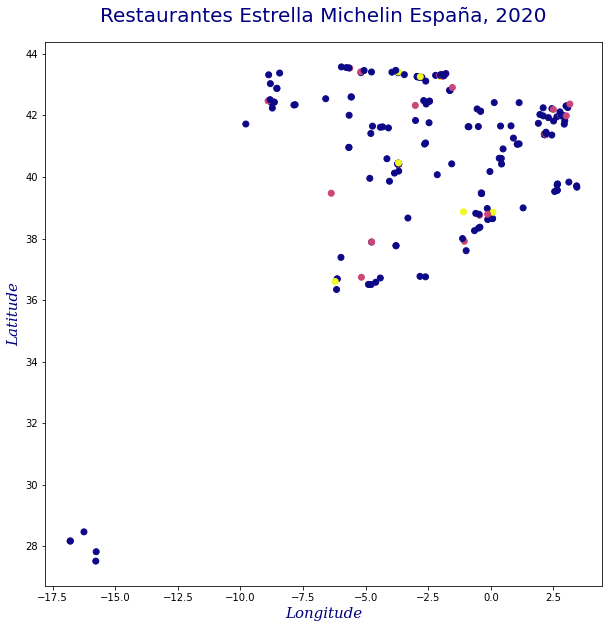

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
font = {'family': 'serif',
        'style': 'italic',
        'color':  'navy',
        'weight': 'normal',
        'size': 15,
        }

ax.set_title('Restaurantes Estrella Michelin España, 2020', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': 'navy'})
ax.set_xlabel('Longitude',fontdict=font)
ax.set_ylabel('Latitude',fontdict=font)

map_data.plot(column = 'michelin_stars', cmap = 'plasma', ax=ax, zorder=5)

## 2. Visualization

#### Michelin Star restaurant per Spanish region

In [7]:
restaurants["region"].value_counts()

Cataluna              54
C.Valenciana          23
C.Madrid              22
Pais Vasco            22
Andalucia             17
Galicia               14
Castilla y Leon       13
Islas Baleares        10
Asturias               8
Castilla la Mancha     7
Aragon                 7
La Rioja               5
Cantabria              5
Islas Canarias         5
Navarra                4
Murcia                 3
Extremadura            1
Name: region, dtype: int64

In [8]:
restaurants.groupby(['michelin_stars']).count()['restaurant']

michelin_stars
1    179
2     30
3     11
Name: restaurant, dtype: int64

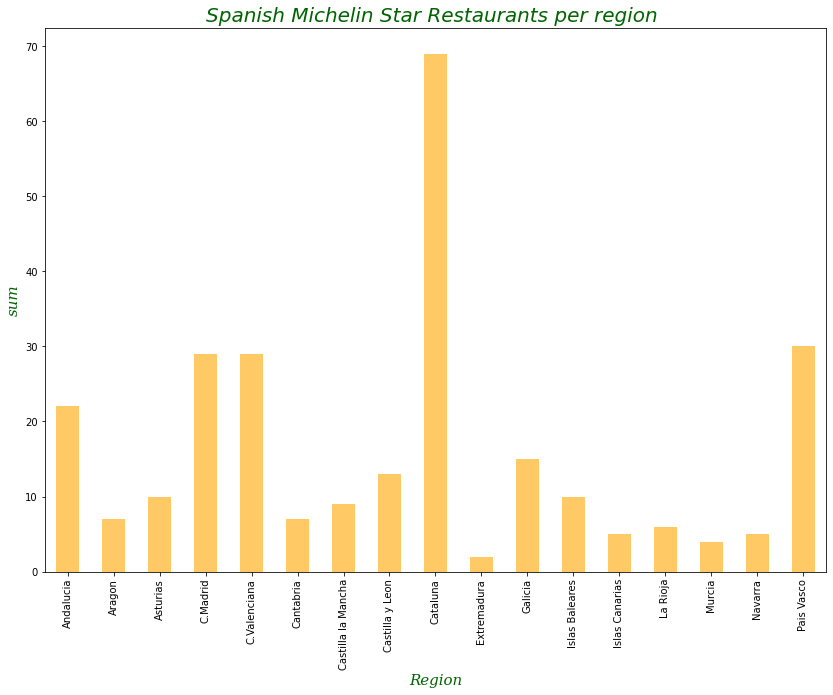

In [9]:
fig, ax = plt.subplots(figsize = (10,20))
font = {'family': 'serif',
        'style': 'italic',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
restaurants.sort_values("region", ascending = True).groupby(['region']).sum()['michelin_stars'].plot(kind='bar',color = 'orange',alpha = 0.6 ,figsize = (14, 10))
ax.set_title('Spanish Michelin Star Restaurants per region ',
             fontdict = {'fontsize':20, 'style': 'italic', 'color': 'darkgreen'})
plt.xlabel('Region', fontdict=font)
plt.ylabel('sum', fontdict=font)
plt.show()

In [10]:
restaurants.groupby(['michelin_stars']).mean()['price_average'].round(1)

michelin_stars
1     86.0
2    143.9
3    214.2
Name: price_average, dtype: float64

In [11]:
# Sum of michelin stars per region
restaurants.groupby(['region']).sum()['michelin_stars']

region
Andalucia             22
Aragon                 7
Asturias              10
C.Madrid              29
C.Valenciana          29
Cantabria              7
Castilla la Mancha     9
Castilla y Leon       13
Cataluna              69
Extremadura            2
Galicia               15
Islas Baleares        10
Islas Canarias         5
La Rioja               6
Murcia                 4
Navarra                5
Pais Vasco            30
Name: michelin_stars, dtype: int64

In [12]:
restaurants.groupby(['region']).mean()['price_average'].round(1)

region
Andalucia             110.2
Aragon                 78.7
Asturias               91.9
C.Madrid              114.2
C.Valenciana           92.2
Cantabria             100.7
Castilla la Mancha     71.0
Castilla y Leon        75.8
Cataluna              102.5
Extremadura           185.0
Galicia                76.8
Islas Baleares         95.2
Islas Canarias        101.2
La Rioja              101.8
Murcia                 82.5
Navarra                93.9
Pais Vasco            132.1
Name: price_average, dtype: float64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


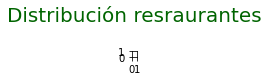

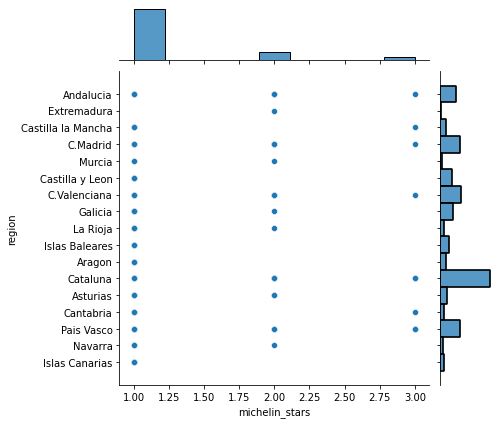

In [13]:
fig, ax = plt.subplots(figsize = (0.1,0.1))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 30,
        }
ax.set_title('Distribución resraurantes', 
             pad = 30, 
             fontdict = {'fontsize':20, 'color': 'darkgreen'})
sns.jointplot(restaurants.michelin_stars, restaurants.region)
plt.xlabel('Michelin stars', fontdict=font)
plt.ylabel('Region', fontdict=font)
plt.show()

In [14]:
restaurants

,restaurant,michelin_stars,city,province,region,coast_province,coordenates,latitude,longitude,price_menu_1,price_menu_2,price_average,type_of_cooking1,type_of_cooking2,international_cooking,regional_cooking
0,Mantua,1,Jerez de la Frontera,Cadiz,Andalucia,Yes,"36.6874279,-6.1380431",36.687428,-6.138043,75,90.0,82.5,Moderna,NaN,NaN,NaN
1,Lu Cocina y Alma,1,Jerez de la Frontera,Cadiz,Andalucia,Yes,"36.6876237,-6.1376777",36.687624,-6.137678,90,150.0,120.0,Moderna,NaN,NaN,NaN
2,Aponiente,3,El Puerto de Santa Maria,Cadiz,Andalucia,Yes,"36.605854,-6.2157528",36.605854,-6.215753,215,NaN,215.0,Creativa,Innovadora,NaN,NaN
3,Alevante,1,Novo Sancti Petri,Cadiz,Andalucia,Yes,"36.3442398,-6.1616944",36.344240,-6.161694,115,135.0,125.0,Creativa,Innovadora,NaN,NaN
4,Abantal,1,Sevilla,Sevilla,Andalucia,No,"37.3879127,-5.98587",37.387913,-5.985870,80,100.0,90.0,Creativa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Kazan,1,Santa Cruz de Tenerife,Santa Cruz de Tenerife,Islas Canarias,Yes,"28.4682464,-16.2505415",28.468246,-16.250542,50,100.0,75.0,Internacional,NaN,Japonesa,NaN
216,La Aquarela,1,Arguineguin,Las Palmas,Islas Canarias,Yes,"27.5184164,-15.778269",27.518416,-15.778269,65,89.0,77.0,Creativa,NaN,NaN,NaN
217,Los Guayres,1,Puerto de Mogan,Las Palmas,Islas Canarias,Yes,"27.8225857,-15.7625521",27.822586,-15.762552,90,105.0,97.5,Moderna,NaN,EspaÂola,NaN
218,Abama Kabuki,1,Guia de Isora,Santa Cruz de Tenerife,Islas Canarias,Yes,"28.1705504,-16.7951248",28.170550,-16.795125,80,145.0,112.5,Internacional,NaN,Japonesa,NaN


### Hypothesis: Restaurant count and distribution per region

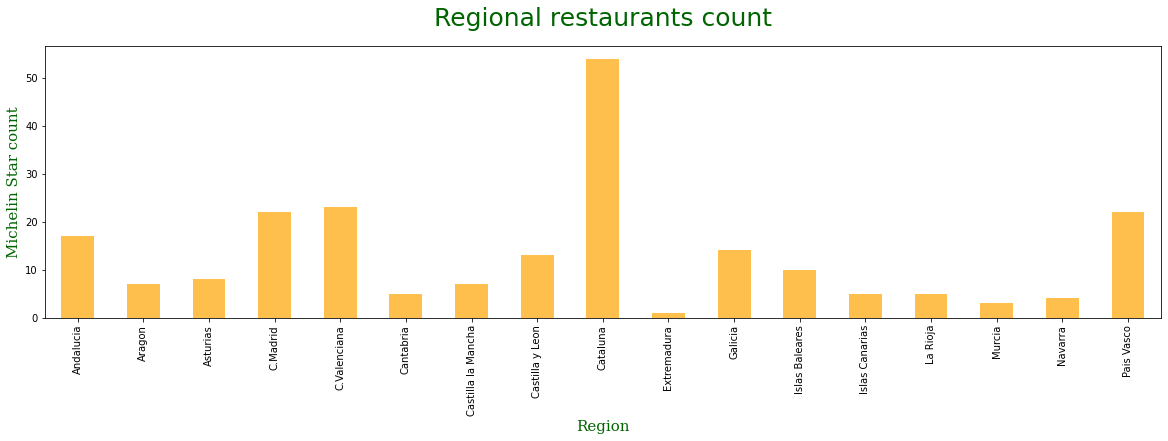

In [15]:
fig, ax = plt.subplots(figsize = (20, 5))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Regional restaurants count', 
             pad = 20, 
             fontdict = {'fontsize':25, 'color': 'darkgreen'})
restaurants.groupby(['region']).count()['restaurant'].plot(kind='bar',color = 'orange',alpha = 0.7,)
plt.xlabel('Region', fontdict=font)
plt.ylabel('Michelin Star count', fontdict=font)
plt.show()

In [16]:
restaurants["region"].value_counts()

Cataluna              54
C.Valenciana          23
C.Madrid              22
Pais Vasco            22
Andalucia             17
Galicia               14
Castilla y Leon       13
Islas Baleares        10
Asturias               8
Castilla la Mancha     7
Aragon                 7
La Rioja               5
Cantabria              5
Islas Canarias         5
Navarra                4
Murcia                 3
Extremadura            1
Name: region, dtype: int64

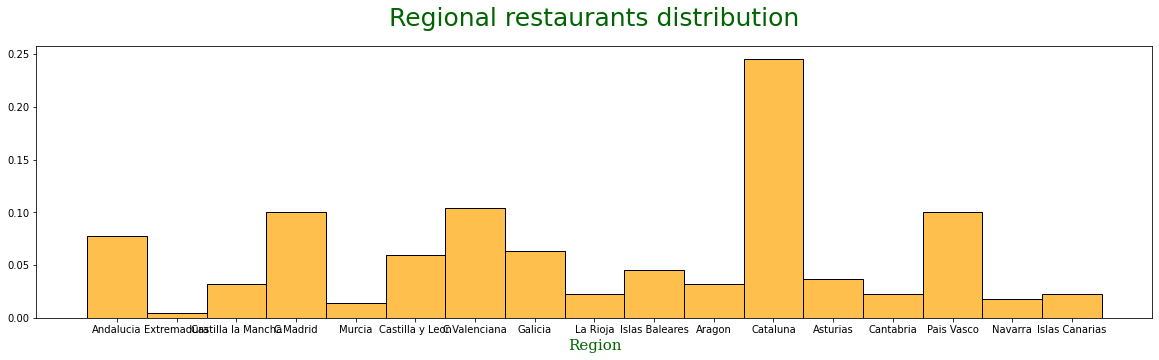

In [17]:
fig, ax = plt.subplots(figsize = (20, 5))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 15,
        }
ax.set_title('Regional restaurants distribution', 
             pad = 20, 
             fontdict = {'fontsize':25, 'color': 'darkgreen'})
sns.histplot(restaurants.region, stat = "probability", discrete = True, color = 'orange',alpha = 0.7)
plt.xlabel('Region', fontdict=font)
plt.ylabel('', fontdict=font)
plt.show()

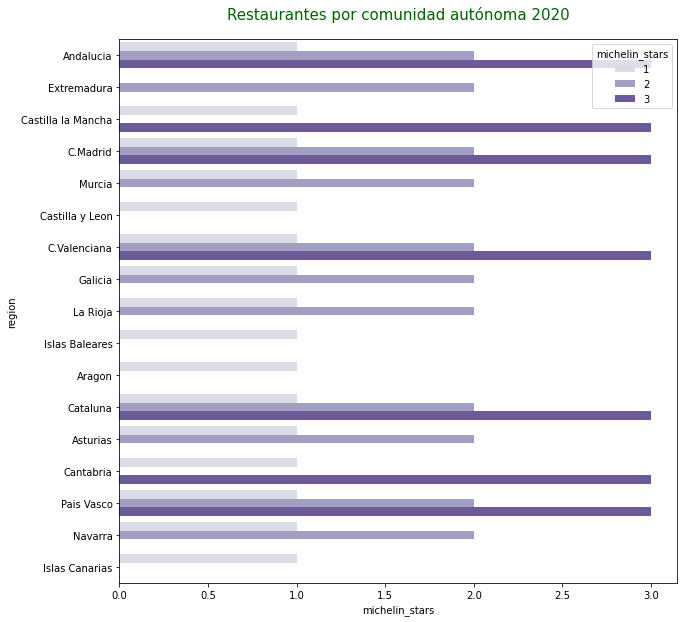

In [18]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.set_title('Restaurantes por comunidad autónoma 2020', 
             pad = 20, 
             fontdict = {'fontsize':15, 'color': 'Darkgreen'})
sns.barplot(x = "michelin_stars", y = "region",hue = "michelin_stars", data = restaurants, ax = ax, palette = "Purples");

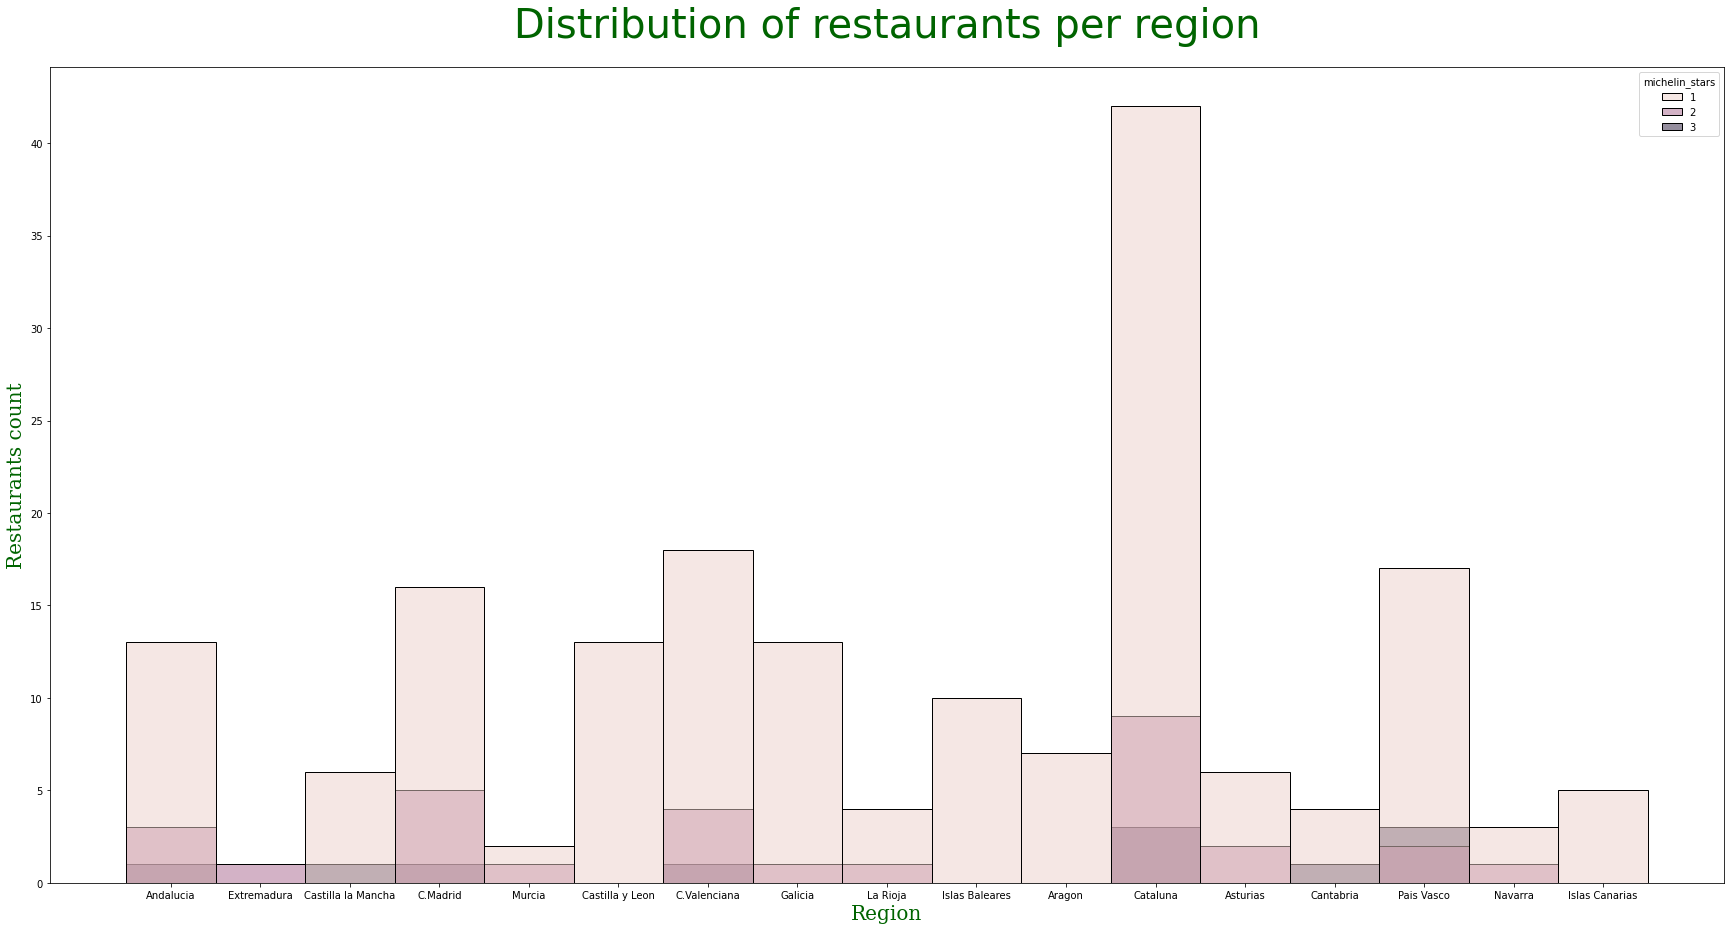

In [19]:
fig, ax = plt.subplots(figsize = (30,15))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 20,
        }
ax.set_title('Distribution of restaurants per region', 
             pad = 30, 
             fontdict = {'fontsize':40, 'color': 'darkgreen'})
sns.histplot(x = restaurants.region, hue = restaurants.michelin_stars, cumulative = False)
plt.xlabel('Region', fontdict=font)
plt.ylabel('Restaurants count', fontdict=font)
plt.show()

### Hypothesis 1: Most of the restaurant are located in coast provinces.

In [20]:
hypothesis1 = restaurants[["restaurant","michelin_stars","province","coast_province"]]
hypothesis1.head()

,restaurant,michelin_stars,province,coast_province
0,Mantua,1,Cadiz,Yes
1,Lu Cocina y Alma,1,Cadiz,Yes
2,Aponiente,3,Cadiz,Yes
3,Alevante,1,Cadiz,Yes
4,Abantal,1,Sevilla,No


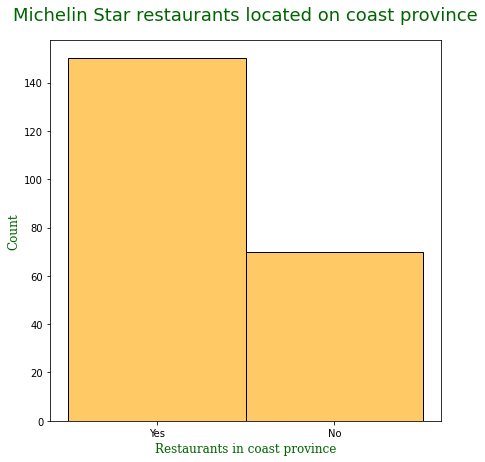

In [21]:
fig, ax = plt.subplots(figsize = (7,7))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 12,
        }
ax.set_title('Michelin Star restaurants located on coast province', 
             pad = 20, 
             fontdict = {'fontsize':18, 'color': 'darkgreen'})
sns.histplot(restaurants.coast_province,color = 'orange', alpha = 0.6)
plt.xlabel('Restaurants in coast province', fontdict=font)
plt.ylabel('Count', fontdict=font)
plt.show()

In [22]:
restaurants['coast_province'].value_counts()

Yes    150
No      70
Name: coast_province, dtype: int64

---
**As it is shown in the graph above, Most of Spain's Michelin-starred restaurants are located in coastal provinces. It sums a total of 150 restaurants, equivalent to 68% of Michelin Spanish restaurants.**

---

### Hypothesis 2: Most Michelin-starred restaurants in Spain have been awarded only one star.

In [23]:
restaurants.michelin_stars.value_counts()

1    179
2     30
3     11
Name: michelin_stars, dtype: int64

<AxesSubplot:title={'center':'Distribution of restaurants based on awarded Michelin Star'}, xlabel='Michelin Star', ylabel='Probability'>

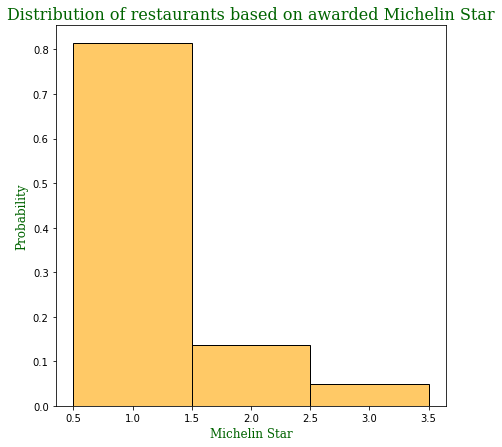

In [24]:
fig, ax = plt.subplots(figsize = (7,7))
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 12,
        }
ax.set_title('Distribution of restaurants based on awarded Michelin Star',
             fontdict = {'family': 'serif','fontsize':16, 'color': 'darkgreen', 'weight': 'normal'})
plt.xlabel('Michelin Star', fontdict=font)
plt.ylabel('Probability', fontdict=font)
sns.histplot(restaurants.michelin_stars, stat = "probability", discrete = True, color = 'orange', alpha = 0.6)

---
**In terms of Stars, the distribution is as follows:  
    - 80% of restaurants are awarded with 1 Michelin Star.  
    - 15% of restaurants are awarded with 2 Michelin Star.  
    - 5% of restaurants are awarded with 1 Michelin Star.**  
    
---

In [25]:
output_file("barplot.html")

options = dict(plot_width=300, plot_height=300,
               tools="pan,wheel_zoom,box_zoom,box_select,lasso_select")

p1 = figure(title="price average vs. michelin stars", **options)
p1.circle("price_average", "michelin_stars", color="green", source = restaurants)


p = gridplot([[p1]], toolbar_location="right")

show(p)

INFO:bokeh.io.state:Session output file 'barplot.html' already exists, will be overwritten.


In [35]:
fig = go.Figure()
 
# Recorremos los datos del archivo csv y extraemos sus coordenadas,
# etiquetas a mostrar y especificamos características del marcador
for i in restaurants:
    fig.add_trace(go.Scattergeo(
            lon = restaurants['longitude'],
            lat = restaurants['latitude'],
            text = restaurants['restaurant'],
            marker = dict(
                size = restaurants['michelin_stars'],
                color = 'lightseagreen',
                line_color='black',
                line_width=0.5,
                sizemode = 'area'
        )))
 
# Establecemos las características del mapa base, el título y opciones
# de leyenda, así como la propia proyección del mapa.
fig.update_layout(
    title_text = 'Restaurantes Estrella Michelin, España 2021',
    showlegend = False,
    geo = dict(
        scope='world',
        resolution=110,
        projection_type='mollweide',
        showcoastlines=True,
        showocean=True,
        oceancolor='#132630',
        lakecolor='#132630',
        coastlinecolor='#224354',
        landcolor='#224354',
    )
)
 
# Mostramos la figura creada con las características dadas
fig.show()